In [110]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000027A94484438>>
Traceback (most recent call last):
  File "C:\Users\34629\Anaconda3\lib\site-packages\xgboost\core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
Using TensorFlow backend.


In [112]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [148]:
train = pd.read_csv('./dummy.csv')

X_train = train.iloc[:,2:len(train)]

y_train = np.array(train["class.e"])

In [125]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(60, input_dim=126, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [116]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=60, batch_size=100, verbose=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/60
6498/6498 [==============================] - 1s 120us/step - loss: 0.5902 - acc: 0.7499
Epoch 2/60
6498/6498 [==============================] - 0s 44us/step - loss: 0.3692 - acc: 0.8543
Epoch 3/60
6498/6498 [==============================] - 0s 43us/step - loss: 0.3189 - acc: 0.8687
Epoch 4/60
6498/6498 [==============================] - 0s 46us/step - loss: 0.3046 - acc: 0.8730
Epoch 5/60
6498/6498 [==============================] - 0s 45us/step - loss: 0.2988 - acc: 0.8758
Epoch 6/60
6498/6498 [==============================] - 0s 48us/step - loss: 0.2916 - acc: 0.8758
Epoch 7/60
6498/6498 [==============================] - 0s 42us/step - loss: 0.2866 - acc: 0.8804
Epoch 8/60
6498/6498 [==============================] - 0s 46us/step - loss: 0.2812 - acc: 0.8810
Epoch 9/60
6498/6498 [==============================] - 0s 46us/step - loss: 0.2748 - acc: 0.8809
Epoch 10/60
6498/6498 [==============================] - 0s 52us/step - loss: 0.2684 - acc: 0.8861
Epoch 11/60
6498/6

6499/6499 [==============================] - 0s 59us/step - loss: 0.1080 - acc: 0.9637
Epoch 46/60
6499/6499 [==============================] - 0s 56us/step - loss: 0.1030 - acc: 0.9688
Epoch 47/60
6499/6499 [==============================] - 0s 53us/step - loss: 0.0991 - acc: 0.9691
Epoch 48/60
6499/6499 [==============================] - 0s 56us/step - loss: 0.0966 - acc: 0.9715
Epoch 49/60
6499/6499 [==============================] - 0s 54us/step - loss: 0.0946 - acc: 0.9715
Epoch 50/60
6499/6499 [==============================] - 0s 52us/step - loss: 0.0919 - acc: 0.9726
Epoch 51/60
6499/6499 [==============================] - 0s 50us/step - loss: 0.0896 - acc: 0.9749
Epoch 52/60
6499/6499 [==============================] - 0s 54us/step - loss: 0.0880 - acc: 0.9746
Epoch 53/60
6499/6499 [==============================] - 0s 51us/step - loss: 0.0856 - acc: 0.9760
Epoch 54/60
6499/6499 [==============================] - 0s 53us/step - loss: 0.0824 - acc: 0.9768
Epoch 55/60
6499/6499 

In [149]:
sel = [randint(0, len(y_train)-1) for p in range(0, 100)]
X_test = X_train.iloc[sel,:]
Y_test = y_train[sel]
X_train = X_train.drop(sel, axis=0)
Y_train = np.delete(y_train,sel)

In [153]:
model = create_baseline()
model.fit(X_train, Y_train, epochs=20, batch_size=100, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Epoch 1/20
8024/8024 [==============================] - 1s 158us/step - loss: 0.5674 - acc: 0.7775
Epoch 2/20
8024/8024 [==============================] - 0s 47us/step - loss: 0.3501 - acc: 0.8582
Epoch 3/20
8024/8024 [==============================] - 0s 50us/step - loss: 0.3114 - acc: 0.8694
Epoch 4/20
8024/8024 [==============================] - 0s 53us/step - loss: 0.3001 - acc: 0.8731
Epoch 5/20
8024/8024 [==============================] - 0s 55us/step - loss: 0.2909 - acc: 0.8772
Epoch 6/20
8024/8024 [==============================] - 0s 49us/step - loss: 0.2827 - acc: 0.8805
Epoch 7/20
8024/8024 [==============================] - 0s 51us/step - loss: 0.2743 - acc: 0.8833
Epoch 8/20
8024/8024 [==============================] - 0s 48us/step - loss: 0.2642 - acc: 0.8890
Epoch 9/20
8024/8024 [==============================] - 0s 48us/step - loss: 0.2554 - acc: 0.8907
Epoch 10/20
8024/8024 [==============================] - 0s 48us/step - loss: 0.2443 - acc: 0.8939
Epoch 11/20
8024/8

In [154]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [157]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 92.00%


In [160]:
ynew = model.predict(X_test)
ynew

array([[  1.34017542e-02],
       [  2.58872509e-01],
       [  1.14963832e-03],
       [  1.99917272e-01],
       [  9.97499764e-01],
       [  9.51432824e-01],
       [  9.27682519e-01],
       [  7.82593037e-04],
       [  5.39746523e-01],
       [  1.20217016e-03],
       [  2.70361695e-02],
       [  9.32482183e-01],
       [  9.94867563e-01],
       [  4.19065952e-02],
       [  9.99875188e-01],
       [  5.85609913e-01],
       [  2.19389319e-01],
       [  2.02490389e-01],
       [  9.88656521e-01],
       [  2.09232882e-01],
       [  9.96976376e-01],
       [  9.26148832e-01],
       [  9.99283016e-01],
       [  5.98399043e-01],
       [  6.56360935e-04],
       [  4.04438749e-02],
       [  6.45461306e-02],
       [  8.80409777e-01],
       [  7.87135184e-01],
       [  9.99004543e-01],
       [  9.81030345e-01],
       [  9.98029172e-01],
       [  9.96475279e-01],
       [  1.56594902e-01],
       [  9.94183600e-01],
       [  1.93655826e-02],
       [  3.14797699e-01],
 

# SKLEARN

In [ ]:
http://ataspinar.com/2017/05/26/classification-with-scikit-learn/

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [163]:
print(train.shape)
display(train.head())
display(train.describe())

(8124, 128)


,class.e,cap.shape.b,cap.shape.c,cap.shape.f,cap.shape.k,cap.shape.s,cap.shape.x,cap.surface.f,cap.surface.g,cap.surface.s,...,population.s,population.v,population.y,habitat.d,habitat.g,habitat.l,habitat.m,habitat.p,habitat.u,habitat.w
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


,class.e,cap.shape.b,cap.shape.c,cap.shape.f,cap.shape.k,cap.shape.s,cap.shape.x,cap.surface.f,cap.surface.g,cap.surface.s,...,population.s,population.v,population.y,habitat.d,habitat.g,habitat.l,habitat.m,habitat.p,habitat.u,habitat.w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.119153,0.088011,0.270187,0.132324,0.091334,0.298991,0.268587,0.140448,0.274126,...,0.161620,0.318932,0.180207,0.255047,0.196824,0.123708,0.087518,0.145249,0.104013,0.087642
std,0.499708,0.323989,0.283328,0.444084,0.338864,0.288102,0.457844,0.443252,0.347473,0.446100,...,0.368124,0.466091,0.384383,0.435914,0.397623,0.329268,0.282611,0.352373,0.305296,0.282790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [164]:
def get_train_test(df, y_col, x_cols, ratio):
    """ 
    This method transforms a dataframe into a train and test set, for this you need to specify:
    1. the ratio train : test (usually 0.7)
    2. the column with the Y_values
    """
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
       
    Y_train = df_train[y_col].values
    Y_test = df_test[y_col].values
    X_train = df_train[x_cols].values
    X_test = df_test[x_cols].values
    return df_train, df_test, X_train, Y_train, X_test, Y_test

y_col = 'class.e'
x_cols = list(train.columns.values)
x_cols.remove(y_col)

train_test_ratio = 0.7
df_train, df_test, X_train, Y_train, X_test, Y_test = get_train_test(train, y_col, x_cols, train_test_ratio)

In [165]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB(),
    #"AdaBoost": AdaBoostClassifier(),
    #"QDA": QuadraticDiscriminantAnalysis(),
    #"Gaussian Process": GaussianProcessClassifier()
}

In [166]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    """
    This method, takes as input the X, Y matrices of the Train and Test set.
    And fits them on all of the Classifiers specified in the dict_classifier.
    The trained models, and accuracies are saved in a dictionary. The reason to use a dictionary
    is because it is very easy to save the whole dictionary with the pickle module.
    
    Usually, the SVM, Random Forest and Gradient Boosting Classifier take quiet some time to train. 
    So it is best to train them on a smaller dataset first and 
    decide whether you want to comment them out or not based on the test accuracy score.
    """
    
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models



def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))

In [167]:
dict_models = batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 8)
display_dict_models(dict_models)

C:\Users\34629\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


trained Logistic Regression in 0.05 s
trained Nearest Neighbors in 0.10 s


C:\Users\34629\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


trained Linear SVM in 2.42 s
trained Gradient Boosting Classifier in 13.80 s
trained Decision Tree in 0.05 s
trained Random Forest in 5.17 s
trained Neural Net in 3.46 s
trained Naive Bayes in 0.01 s


,classifier,train_score,test_score,train_time
3,Gradient Boosting Classifier,0.982143,0.911264,13.799266
6,Neural Net,0.939180,0.891410,3.458333
5,Random Forest,1.000000,0.881280,5.172445
2,Linear SVM,0.885078,0.867099,2.416393
0,Logistic Regression,0.877298,0.858590,0.050240
1,Nearest Neighbors,0.888967,0.811183,0.098396
4,Decision Tree,1.000000,0.806321,0.049847
7,Naive Bayes,0.790488,0.791734,0.014652


In [174]:
dict_models["Nearest Neighbors"]

{'model': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'),
 'train_score': 0.88896746817538896,
 'test_score': 0.81118314424635329,
 'train_time': 0.09839607350493405}

In [186]:
a = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform')

In [187]:
a.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [197]:
a.score(X_test, Y_test)

0.81118314424635329

In [189]:
a.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [191]:
import pickle

In [198]:
filename = 'KNN.sav'
pickle.dump(a, open(filename, 'wb'))

In [196]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.811183144246


In [31]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import random

In [32]:
# paths
#test_file_path = '../02 Files/training/finalTest.csv'
training_file_path = './dummy.csv'

In [45]:
# read training data

file = pd.read_csv(training_file_path, sep = ',')
#file_numeric = file.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

#file_numeric_columns = file_numeric.values.shape[1]
X_pre = file.values[:,2:len(file.iloc[1,:])] # avoid last two columns: ids and churn
Y_pre = file.values[:,1] # select last column (churn) as target

sel = [random.randint(0, len(Y)-1) for p in range(0, 1000)]
X_test = X[sel][:]
Y_test = Y[sel]

X = np.delete(X,sel, axis=0)
Y = np.delete(Y,sel)
Xt, Xv, yt, yv = train_test_split(X, Y, test_size = 0.25, random_state = 0)

print("-- Data shape")
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_pre.shape)
print(Y_pre.shape)

-- Data shape
(6251, 126)
(6251,)
(7181, 126)
(7181,)
(1000, 126)
(1000,)
(8124, 126)
(8124,)


In [50]:
params = {'eta': 0.02, 'max_depth': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'binary:logistic', 'seed': 99, 'silent': 1, 'eval_metric':'error', 'nthread':4}
xg_train = xgb.DMatrix(Xt, label=yt)
cv = xgb.cv(params, xg_train, 500, nfold=10, early_stopping_rounds=12, verbose_eval=1)

[0]	train-error:0.0773856+0.0154282	test-error:0.0818991+0.0171577
[1]	train-error:0.0627378+0.0178157	test-error:0.0652685+0.0204879
[2]	train-error:0.0520239+0.00640074	test-error:0.0561012+0.0138881
[3]	train-error:0.0528304+0.00592176	test-error:0.0571642+0.0132632
[4]	train-error:0.0488959+0.00706177	test-error:0.0543911+0.0115187
[5]	train-error:0.0473789+0.00654065	test-error:0.0499129+0.011284
[6]	train-error:0.0449612+0.00380985	test-error:0.0473544+0.00807777
[7]	train-error:0.0430887+0.00240826	test-error:0.044368+0.00623455
[8]	train-error:0.0436813+0.00215587	test-error:0.046076+0.00620156
[9]	train-error:0.0428991+0.00295008	test-error:0.0456491+0.0067626
[10]	train-error:0.0433968+0.00252204	test-error:0.0452219+0.00652481
[11]	train-error:0.0425198+0.00181022	test-error:0.0445822+0.00684149
[12]	train-error:0.0426384+0.00199082	test-error:0.0456492+0.00676265
[13]	train-error:0.0422117+0.00178947	test-error:0.044582+0.00747667
[14]	train-error:0.0417378+0.00230813	test-

In [47]:
params2 = {'eta': 0.02, 'max_depth': 5, 'objective': 'binary:logistic', 'seed': 99, 'silent': 1, 'eval_metric':'error', 'nthread':4}
cv2 = xgb.train(params2, xg_train, 300, verbose_eval=1)

In [51]:
xg_test = xgb.DMatrix(Xv, label=yv)
y_pred = cv2.predict(xg_test)

In [38]:
y_pred

array([ 0.00165379,  0.00189072,  0.00165379,  0.00195375,  0.00311784,
        0.00311784,  0.00165379,  0.00177009,  0.00165379,  0.99913543,
        0.00177009,  0.00165379,  0.00181094,  0.00237115,  0.9984073 ,
        0.00311784,  0.00165379,  0.00311784,  0.00237115,  0.00177117,
        0.00177009,  0.00311784,  0.00171647,  0.00300849,  0.00167878,
        0.0016452 ,  0.00180621,  0.00165379,  0.00177009,  0.00167878,
        0.00165379,  0.00165379,  0.00169826,  0.00300849,  0.00165379,
        0.99796152,  0.00165379,  0.001855  ,  0.00165379,  0.00165379,
        0.0017559 ,  0.00311784,  0.0017851 ,  0.00311784,  0.00165379,
        0.0017559 ,  0.00177117,  0.00165379,  0.00252415,  0.00300849,
        0.00300849,  0.00177009,  0.99842584,  0.00177009,  0.00165379,
        0.0017851 ,  0.01630876,  0.98166394,  0.9979068 ,  0.00311784,
        0.00181769,  0.00311784,  0.00300849,  0.99900132,  0.00173575,
        0.9934001 ,  0.99729532,  0.00165379,  0.00165379,  0.99

In [53]:
cm = confusion_matrix(yv, (y_pred>0.5))
cm

array([[1390,    0],
       [   0,  173]], dtype=int64)

In [54]:
xg_test2 = xgb.DMatrix(X_test, label=Y_test)
y_pred2 = cv2.predict(xg_test2)

In [55]:
cm = confusion_matrix(Y_test, (y_pred2>0.5))
cm

array([[888,   0],
       [  0, 112]], dtype=int64)

In [43]:
np.sum(Y_test)

119

In [68]:
clf.predict

In [75]:
y_pred3 = clf.predict(X_test)

AttributeError: 'XGBClassifier' object has no attribute '_le'

In [88]:
preds[0]

0.99961531

In [82]:
Y_test[1]

0

In [87]:
Y_test[0]

1

In [92]:
import joblib
#save model
joblib.dump(xgb, "filex") 

#load saved model
xgb1 = joblib.load("filex")

ModuleNotFoundError: No module named 'joblib'

In [70]:
cv2.save_model("model1")
clf = xgb.XGBClassifier()
clf.load_model("model1")

In [71]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [72]:
xg_test = xgb.DMatrix(X_test, label=Y_test)
preds = cv2.predict(xg_test)

In [66]:
clf

In [61]:
xg_test2 = xgb.DMatrix(X_test, label=Y_test)
y_pred3 = clf.predict(xg_test2)

AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
cm = confusion_matrix(Y_test, (y_pred3>0.5))
cm

In [106]:
cv2.predict(xg_test)

array([  9.99615312e-01,   3.14073375e-04,   1.63772202e-04,
         3.53049312e-04,   2.73708632e-04,   5.14160085e-04,
         3.51104885e-04,   2.85620015e-04,   8.41365691e-05,
         9.75929499e-01,   2.36784908e-04,   9.99629498e-01,
         9.99156356e-01,   2.52761558e-04,   1.73958324e-04,
         4.47716622e-04,   2.05306962e-04,   4.66405472e-04,
         9.99682426e-01,   3.47795110e-04,   1.88590551e-04,
         1.58580864e-04,   2.46714847e-03,   1.28087311e-04,
         4.02475853e-04,   2.71875033e-04,   1.41946337e-04,
         4.43322991e-04,   2.06555167e-04,   9.99633551e-01,
         9.93703663e-01,   9.99402165e-01,   2.48651952e-04,
         4.33497771e-04,   7.13844958e-04,   5.46412659e-04,
         5.55775187e-04,   9.99768794e-01,   4.98157286e-04,
         8.55034814e-05,   2.60895904e-04,   8.81605316e-04,
         1.63130870e-04,   1.96499794e-04,   4.83259762e-04,
         9.99469697e-01,   3.51481664e-04,   4.35905124e-04,
         6.84275059e-04,

# PCA

In [215]:
from sklearn.preprocessing import LabelEncoder
X = pd.read_csv("mushrooms_v2 (prob 0.05).csv")
labelencoder=LabelEncoder()
for col in X.columns:
    X[col] = labelencoder.fit_transform(X[col])
X.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,4,0,3,1,6,2,1,1,4,...,2,1,1,0,2,3,5,2,2,5
1,0,5,1,9,1,0,1,0,0,4,...,3,2,2,0,2,2,5,6,0,4
2,0,3,2,4,1,3,2,2,0,5,...,1,0,0,0,2,2,5,3,4,1
3,1,0,3,8,1,8,2,0,1,1,...,1,7,3,0,2,0,4,2,3,5
4,0,0,2,3,0,5,3,0,0,6,...,2,7,2,0,2,0,7,7,0,1


In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

C:\Users\34629\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\34629\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.0366127 ,  0.64674044, -1.38466439, ..., -0.71586312,
        -0.60828579,  1.31478018],
       [-0.96468045,  1.22711372, -0.53995361, ...,  0.89267567,
        -1.83451749,  0.82166933],
       [-0.96468045,  0.06636716,  0.30475718, ..., -0.31372842,
         0.61794591, -0.65766323],
       ..., 
       [-0.96468045,  1.22711372,  0.30475718, ...,  0.08840627,
        -1.22140164, -0.16455238],
       [ 1.0366127 ,  0.06636716,  1.14946796, ...,  0.49054097,
         0.61794591,  1.80789103],
       [-0.96468045,  0.64674044,  0.30475718, ...,  0.08840627,
         1.23106176, -0.16455238]])

In [217]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 0.22964182,  0.59653542, -0.61242004, ...,  0.42775009,
         0.19944497,  0.10542508],
       [ 0.9652148 ,  1.28275555, -2.60315662, ...,  0.03902786,
        -0.53134428, -0.1028069 ],
       [ 0.04209313,  0.91602452, -1.72257574, ...,  0.57874199,
        -0.23531289,  0.5045059 ],
       ..., 
       [-0.55916338, -1.48019419, -0.72926368, ..., -1.09726788,
        -1.83810528,  0.34984613],
       [-2.48091146, -0.00698739,  2.36678319, ...,  0.57043753,
        -0.35436503,  0.3080756 ],
       [ 1.14754153,  0.48990219, -1.9130417 , ..., -0.96026325,
        -0.5149939 , -0.53922114]])

In [218]:
covariance=pca.get_covariance()

In [222]:
explained_variance=pca.explained_variance_
explained_variance

array([ 3.25020536,  1.99995145,  1.85863614,  1.59958191,  1.31105088,
        1.09615354,  1.00017658,  0.97360123,  0.88058371,  0.85989547,
        0.80024158,  0.76130133,  0.70009461,  0.67913036,  0.66317623,
        0.63560203,  0.63090608,  0.611342  ,  0.58729684,  0.56813   ,
        0.52996335,  0.51174613,  0.49406467])

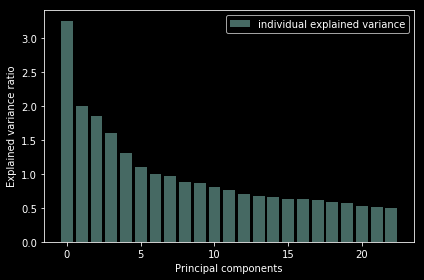

In [224]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(23), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

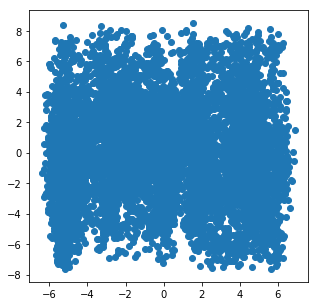

In [225]:
N=data.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

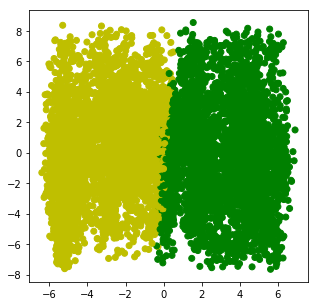

In [226]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

# GRID

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [237]:
from sklearn.model_selection import GridSearchCV

model_LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

In [256]:
from sklearn.model_selection import train_test_split
X = pd.read_csv("mushrooms_v2 (prob 0.05).csv")
labelencoder=LabelEncoder()
for col in X.columns:
    X[col] = labelencoder.fit_transform(X[col])
scaler = StandardScaler()
X=scaler.fit_transform(X)

C:\Users\34629\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\34629\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [261]:
y

array([ 1.0366127 ,  0.64674044, -1.38466439, -0.54823812,  1.06804095,
        0.81200206,  0.35193466,  0.37991222,  1.21493801, -0.34092587,
       -1.04766348,  0.30807529,  0.49342871,  0.48577081, -1.54821733,
       -1.54683611, -0.60104913,  0.33225237,  1.19263914,  0.76965624,
       -0.71586312, -0.60828579,  1.31478018])

In [265]:
from sklearn.model_selection import train_test_split
X = pd.read_csv("mushrooms_v2 (prob 0.05).csv")
labelencoder=LabelEncoder()
for col in X.columns:
    X[col] = labelencoder.fit_transform(X[col])
y = X[:][0]
X = X[:][1:22]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

KeyError: 0

In [264]:
model_LR.fit(X_train,y_train)

C:\Users\34629\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\34629\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 's'

In [240]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

In [241]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [242]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

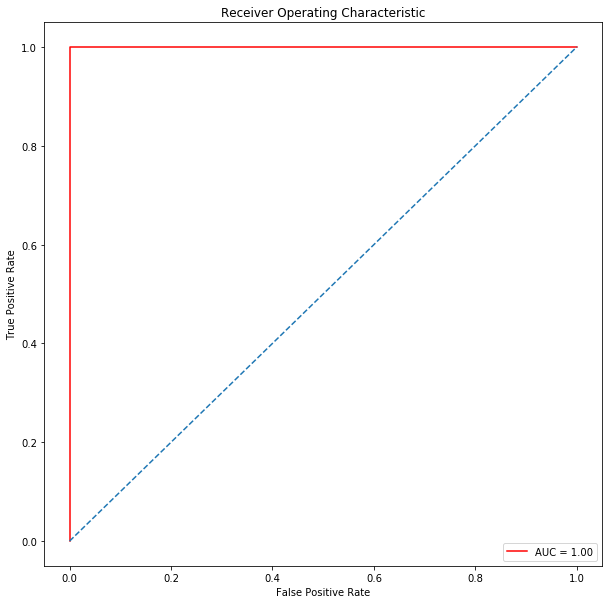

In [243]:
0.9902988924290701
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [244]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [245]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)

1.0

In [246]:
X_train

array([[ 1.0366127 , -0.51400613,  1.14946796, ..., -1.11799782,
         1.23106176,  0.82166933],
       [-0.96468045,  1.22711372, -1.38466439, ..., -0.31372842,
        -1.22140164, -1.15077408],
       [ 1.0366127 , -0.51400613, -1.38466439, ..., -1.11799782,
         0.61794591,  0.82166933],
       ..., 
       [-0.96468045,  1.22711372, -1.38466439, ...,  0.08840627,
         0.00483006, -1.15077408],
       [-0.96468045, -0.51400613,  1.14946796, ...,  1.69694506,
         0.00483006, -0.65766323],
       [-0.96468045, -1.67475269, -0.53995361, ...,  0.89267567,
         0.00483006, -0.65766323]])